In [123]:
import pandas as pd
import string
import re

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

from PIL import Image
import requests
from io import BytesIO
import pytesseract

In [122]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\agcwi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [124]:
messy_df = pd.read_pickle('../data/messy_df.pkl')

In [125]:
messy_df.head()

,created_utc,num_comments,subreddit,subreddit_subscribers,text,title,upvote_ratio,url,image?
0,1.502177e+09,840.0,TheRedPill,0.0,"As reported in Bloomberg, Google has fired a s...",Google Fires Ph.D Biologist/Engineer For Claim...,0.65,https://www.reddit.com/r/TheRedPill/comments/6...,False
1,1.480424e+09,759.0,TheRedPill,0.0,**A complete guide to picking up 9s and 10s** ...,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,0.82,https://www.reddit.com/r/TheRedPill/comments/5...,False
2,1.502101e+09,179.0,TheRedPill,0.0,**Practical Stoicism Tools**\n\nStoicism philo...,I have been practicing Stoicism for 3 years no...,0.86,https://www.reddit.com/r/TheRedPill/comments/6...,False
3,1.433962e+09,954.0,TheRedPill,0.0,The most notorious target was FatPeopleHate. Y...,"[META] Reddit rolls out first ban wave of ""Har...",0.87,https://www.reddit.com/r/TheRedPill/comments/3...,False
4,1.500270e+09,336.0,TheRedPill,0.0,Kind of surprised this hasn't made its way her...,"Man gets his ex-GF to pay child support, and R...",0.90,https://www.reddit.com/r/TheRedPill/comments/6...,False


In [126]:
#TODO: Image processing: do on windows machine because tessaract only runs on linux and windows

# image_text = []

# for index, row in messy_df.iterrows():
#     if row['image?']:
#         response = requests.get(row['url'])
#         image = Image.open(BytesIO(response.content))
#         image_string = pytesseract.image_to_string(image)
#     else:
#         image_string = ''

#     print(image_string)
#     image_text.append(image_string)


In [127]:
messy_df['total_text'] = messy_df['title'] + messy_df['text']

In [128]:
messy_df = messy_df.drop(columns= ['title', 'text'])

In [129]:
messy_df['total_text'].dropna()

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
11004                       The is Los Angeles, California
11005                                    Personal freedoms
11006                                  Progressive Liberal
11007                                                Welp…
11008                                  You guys were right
Name: total_text, Length: 11009, dtype: object

In [130]:
messy_df['total_text']

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
11004                       The is Los Angeles, California
11005                                    Personal freedoms
11006                                  Progressive Liberal
11007                                                Welp…
11008                                  You guys were right
Name: total_text, Length: 11009, dtype: object

In [131]:
stopwords_ = stopwords.words('English')
stopwords_ += list(string.punctuation)
stopwords_ += ['’', "'s", "n't", "''", '``', '--', '”', '“', "'m", '...', "'ll", "'d", '‘', "'re", "'ve", "\\-", '—', '–', 'x200b', '..']

stopwords_ += ['r', 'www', 'https', 'http', 'com', 'post', 'sub', 'account', 'imgur'] #commonly used reddit link words
# stopwords_ += ['like', 'would', 'much', 'also', 'really', 'even', 'gt', 'us', 'never', 'see', 'way', 'could', 'back', 'need', 'take', 'get',
#                  'one', 'time', 'want', 'make', 'know', 'thing', 'got', 'many', 'every', 'let', 'lot', 'ever', 'around', 'put', 'enough',
#                  'sure', 'may', 'must', 'went', 'often', 'might', 'get', 'probably', 'literally', 'though', 'else', 'least', 'yet', 'set', 
#                  'oh', 'na', 'finally', 'nbsp', 'almost', 'simply', 'wo', 'whatever', 'sometimes', 'completely', 'permanently', 'actual', 'possible',
#                  'absolutely', 'within', 'including', 'thing', 'something'] #common words in the dataset

In [132]:
lemmatizer = WordNetLemmatizer()

In [133]:
def stop_and_lemmatize(string):
    """
    Helper function for eda on the total corpus
    """
    #current = re.split(r'[^a-zA-Z]', string)
    current = word_tokenize(string)

    total = [x.lower() for x in current if x.lower() not in stopwords_]

    final = [lemmatizer.lemmatize(x) for x in total]

    return final

In [134]:
messy_df['tokenned_stopped_text'] = messy_df['total_text'].apply(stop_and_lemmatize)

In [135]:
messy_df

,created_utc,num_comments,subreddit,subreddit_subscribers,upvote_ratio,url,image?,total_text,tokenned_stopped_text
0,1.502177e+09,840.0,TheRedPill,0.0,0.65,https://www.reddit.com/r/TheRedPill/comments/6...,False,Google Fires Ph.D Biologist/Engineer For Claim...,"[google, fire, ph.d, biologist/engineer, claim..."
1,1.480424e+09,759.0,TheRedPill,0.0,0.82,https://www.reddit.com/r/TheRedPill/comments/5...,False,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"[get, laid, like, warlord, 37, rule, approachi..."
2,1.502101e+09,179.0,TheRedPill,0.0,0.86,https://www.reddit.com/r/TheRedPill/comments/6...,False,I have been practicing Stoicism for 3 years no...,"[practicing, stoicism, 3, year, quality, life,..."
3,1.433962e+09,954.0,TheRedPill,0.0,0.87,https://www.reddit.com/r/TheRedPill/comments/3...,False,"[META] Reddit rolls out first ban wave of ""Har...","[meta, reddit, roll, first, ban, wave, harassi..."
4,1.500270e+09,336.0,TheRedPill,0.0,0.90,https://www.reddit.com/r/TheRedPill/comments/6...,False,"Man gets his ex-GF to pay child support, and R...","[man, get, ex-gf, pay, child, support, reddit,..."
...,...,...,...,...,...,...,...,...,...
11004,1.633457e+09,900.0,Anarcho_Capitalism,186148.0,0.88,https://v.redd.it/0ptsjdwh9or71,False,"The is Los Angeles, California","[los, angeles, california]"
11005,1.632157e+09,2229.0,Anarcho_Capitalism,186148.0,0.83,https://i.redd.it/xmgcuoawtoo71.png,True,Personal freedoms,"[personal, freedom]"
11006,1.591131e+09,141.0,Anarcho_Capitalism,186148.0,0.93,https://i.imgur.com/ticpuuy.jpg,True,Progressive Liberal,"[progressive, liberal]"
11007,1.638208e+09,506.0,Anarcho_Capitalism,186148.0,0.89,https://i.redd.it/dcyjbpirmk281.jpg,True,Welp…,[welp…]


In [136]:
corpus_series = messy_df['tokenned_stopped_text']

In [137]:
corpus_series

0        [google, fire, ph.d, biologist/engineer, claim...
1        [get, laid, like, warlord, 37, rule, approachi...
2        [practicing, stoicism, 3, year, quality, life,...
3        [meta, reddit, roll, first, ban, wave, harassi...
4        [man, get, ex-gf, pay, child, support, reddit,...
                               ...                        
11004                           [los, angeles, california]
11005                                  [personal, freedom]
11006                               [progressive, liberal]
11007                                              [welp…]
11008                                         [guy, right]
Name: tokenned_stopped_text, Length: 11009, dtype: object

In [138]:
new_corpus_series = []

for word_list in corpus_series:
    new_corpus_series.extend(word_list)

In [139]:
new_corpus_series = pd.Series(new_corpus_series)

In [140]:
len(new_corpus_series)

269971

In [141]:
freqdist = FreqDist(new_corpus_series)
most_common = freqdist.most_common(500)
most_common

[('woman', 2470),
 ('like', 1785),
 ('people', 1481),
 ('get', 1441),
 ('men', 1400),
 ('one', 1347),
 ('time', 1201),
 ('would', 1122),
 ('trump', 1108),
 ('want', 996),
 ('make', 947),
 ('girl', 890),
 ('amp', 880),
 ('guy', 843),
 ('know', 835),
 ('gt', 827),
 ('say', 812),
 ('even', 802),
 ('thing', 798),
 ('year', 798),
 ('go', 755),
 ('think', 754),
 ('day', 748),
 ('life', 743),
 ('see', 688),
 ('way', 686),
 ('man', 684),
 ('u', 676),
 ('never', 660),
 ('right', 642),
 ('need', 627),
 ('good', 623),
 ('going', 604),
 ('much', 595),
 ('first', 595),
 ('also', 591),
 ('take', 570),
 ('really', 570),
 ('got', 570),
 ('could', 566),
 ('look', 538),
 ('work', 536),
 ('feel', 522),
 ('back', 507),
 ('biden', 500),
 ('sex', 499),
 ('many', 489),
 ('new', 486),
 ('made', 468),
 ('every', 465),
 ('something', 461),
 ('friend', 440),
 ('still', 438),
 ('feminist', 436),
 ('lot', 434),
 ('said', 426),
 ('let', 426),
 ('president', 423),
 ('reddit', 416),
 ('well', 410),
 ('someone', 409),

In [142]:
top_30 = most_common[0:30]

In [143]:
x = []
y = []

for tuple in top_30:
    x.append(tuple[0])
    y.append(tuple[1])

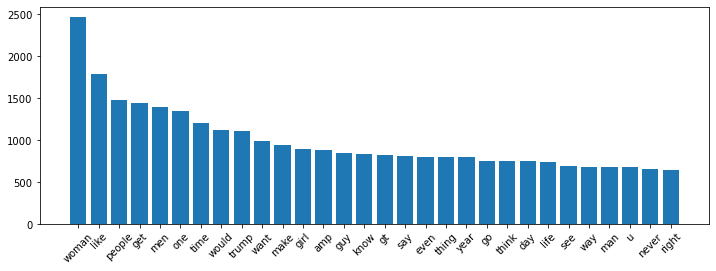

In [144]:
fig, ax = plt.subplots()

fig.set_figwidth(12)

ax.bar(x,y)
plt.xticks(rotation = 45)
plt.show()

In [145]:
messy_df['finalized_text'] = messy_df['tokenned_stopped_text'].apply(lambda x: " ".join(x))

## Combine text by subreddit for clustering

In [ ]:
# work here

In [146]:
# Pickle data for modeling

pd.to_pickle(messy_df, '../data/preprocessed_df.pkl')

## Topic Modeling

In [147]:
lda_text = messy_df['finalized_text'].apply(lambda x: x.split(" "))

In [148]:
corpus_dictionary = Dictionary(lda_text)
corpus = [corpus_dictionary.doc2bow(text) for text in lda_text]

In [149]:
lda = LdaModel(corpus, num_topics = 10, id2word= corpus_dictionary)

In [150]:
lda.print_topics(num_words = 20)

[(0,
  '0.018*"meme" + 0.007*"n" + 0.006*"invasion" + 0.006*"nazi" + 0.006*"elon" + 0.005*"one" + 0.005*"trump" + 0.005*"gon" + 0.004*"musk" + 0.004*"police" + 0.004*"na" + 0.004*"day" + 0.004*"testified" + 0.004*"gun" + 0.004*"country" + 0.003*"dislike" + 0.003*"like" + 0.003*"year" + 0.003*"tell" + 0.003*"new"'),
 (1,
  '0.005*"new" + 0.005*"hypocrisy" + 0.005*"transgender" + 0.004*"time" + 0.004*"square" + 0.004*"oc" + 0.004*"one" + 0.003*"2006" + 0.003*"andrew" + 0.003*"auto=webp" + 0.003*"underage" + 0.003*"damn" + 0.003*"update" + 0.003*"credit" + 0.003*"image" + 0.003*"format=png" + 0.003*"amp" + 0.003*"john" + 0.002*"warehouse" + 0.002*"gem"'),
 (2,
  '0.010*"trump" + 0.008*"" + 0.006*"amp" + 0.006*"banned" + 0.006*"twitter" + 0.005*"tax" + 0.005*"policy" + 0.005*"american" + 0.004*"predicted" + 0.004*"racism" + 0.004*"u" + 0.004*"rapist" + 0.004*"l" + 0.003*"year" + 0.003*"people" + 0.003*"ban" + 0.003*"2009" + 0.003*"conservative" + 0.003*"texas" + 0.003*"reddit"'),
 (3,
  '0